# Clase 2. Modelos de Clasificación 

##  Lectura de datos en Python y Feature Engineering 

In [36]:
try:
    import os
    os.chdir('ML_training_01/')
except:
    print("el folder actual es el señalado")

el folder actual es el señalado


In [37]:
!ls

'Capacitacion ML Bigquery.ipynb'	      Untitled.ipynb
'Capacitación  Introducción ML-Copy1.ipynb'   data
'Capacitación  Introducción ML.ipynb'	      functions


Los Archivos en sistemas de ingrados de informacion, generalmente no permiten titulos de columnas con caracteres especiales, tildes o espacios. La siguiente clase permite leer de forma normalizada los archivos. Inicialmente leemos una clase hecha para esto, en seguida leemos el archivo, al usar la funcion "load_simple_file_class" obtenemos la tabla,  el  schema_ apropiado para cargar en Bigquery, y el nombre de las columnas

In [4]:
#!git clone https://github.com/JAPJ182/ML_training_01.git

In [38]:
execfile("functions/ML_train_functions_gcp.py")

In [39]:
%%bash
head -1 data/fraude.csv

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude


In [40]:
datos = load_simple_file_class(path = "data/fraude.csv" )

### Lectura de datos

In [41]:
data = datos.read_table()[0]

esquema creado correctamente


### Transformaciones simples

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data['FECHA'] = pd.to_datetime(data['FECHA'])
data['DAYOFWEEK'] = data['FECHA'].dt.dayofweek
data['MONTH'] = data['FECHA'].dt.month
data['FRAUDE'] =   np.where(data['FRAUDE']==True, 1,0)

[Text(0, 0, 'No fraude'), Text(1, 0, 'fraude')]

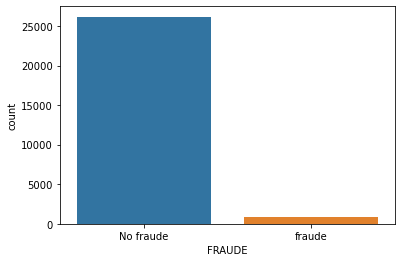

In [44]:
import seaborn as sns
# visualize the target variable
g = sns.countplot(data['FRAUDE'])
g.set_xticklabels(['No fraude','fraude'])

## Under-Sampling y Over-Sampling

In [45]:
class_count_0, class_count_1 = data['FRAUDE'].value_counts()
# Separate class
class_0 = data[data['FRAUDE'] == 0]
class_1 = data[data['FRAUDE'] == 1]
 # print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (26165, 19)
class 1: (810, 19)


In [47]:
810 / (810 +26165)

0.030027803521779424

#### Under-sampling

[Text(0, 0, 'No fraude'), Text(1, 0, 'fraude')]

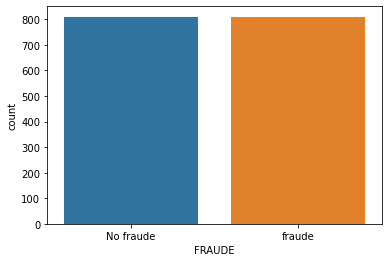

In [48]:
class_0_under = class_0.sample(class_count_1)
data_under = pd.concat([class_0_under, class_1], axis=0)
sns.countplot(data_under['FRAUDE']).set_xticklabels(['No fraude','fraude'])

#### Over-sampling

[Text(0, 0, 'No fraude'), Text(1, 0, 'fraude')]

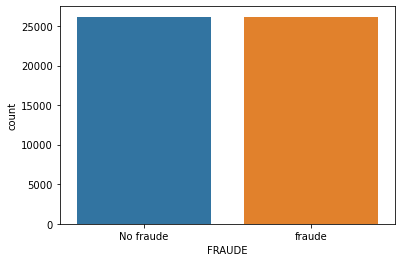

In [49]:
class_1_over = class_1.sample(class_count_0, replace=True)
data_over = pd.concat([class_1_over, class_0], axis=0)
sns.countplot(data_over['FRAUDE']).set_xticklabels(['No fraude','fraude'])

### Transformaciones

In [81]:
VARIABLES_INDEPENDIENTES= ['GENERO', 'MONTO', 'DAYOFWEEK','MONTH' , 'HORA',  
        'ESTABLECIMIENTO', 'CIUDAD', 'TIPOTC', 'LINEATC', 'INTERESTC',
          'STATUSTXN', 'ISPRIME', 'DCTO', 'CASHBACK']

VARIABLE_DEPENDEINTE = 'FRAUDE'

VARIABLES_INDEP_NUMERICAS = ['MONTO', 'DCTO', 'CASHBACK' , 'DAYOFWEEK','MONTH' , 'HORA' ]

VARIABLES_INDEP_CATEGORICAS = [ 'GENERO',   'ESTABLECIMIENTO', 'CIUDAD', 
                               'TIPOTC', 'LINEATC', 'INTERESTC',
                               'STATUSTXN', 'ISPRIME' ]

X_train, X_test, y_train, y_test = feature_eng(tabla=data, 
                                               X=VARIABLES_INDEPENDIENTES,
                                               Y=VARIABLE_DEPENDEINTE,
                                               X_num=VARIABLES_INDEP_NUMERICAS ,
                                               X_Cat=VARIABLES_INDEP_CATEGORICAS )
 

### Metricas

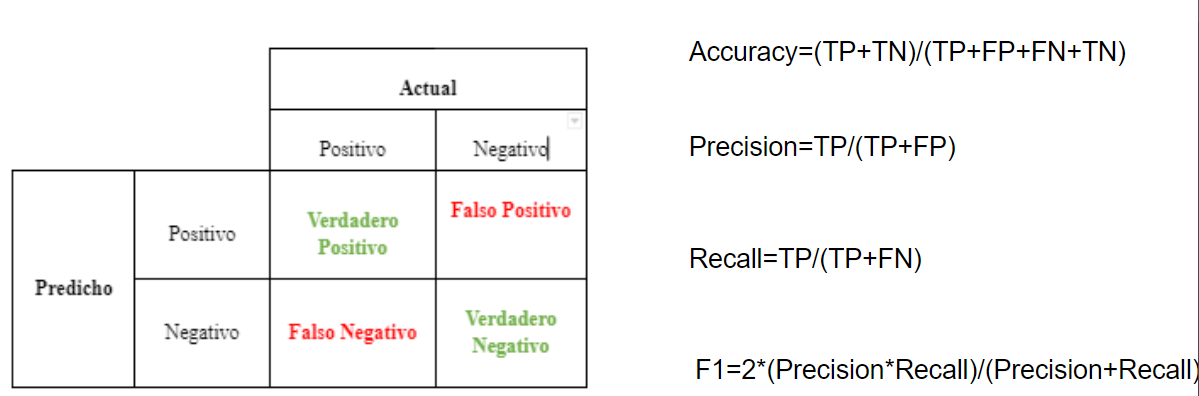

if interes == 1:
    Preci = TN/(TN+T)


## AutoML Classification

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *

In [66]:
execfile("functions/ML_train_functions_gcp.py")

#### Normal data

In [67]:
%%time
automl_class = funcion_automl(X_train , y_train ,  y_test , X_test )
resultado = automl_class.run_automl_models()
resultado  

CPU times: user 49.1 s, sys: 1.79 s, total: 50.9 s
Wall time: 15.9 s


,Accuracy,Precision,Recall,F1,ROC-AUC
Modelo,,,,,
Regresion Logistica,0.559810,0.554869,0.579862,0.567090,0.559922
Naive Bayes,0.559963,0.546541,0.675173,0.604085,0.560603
Árbol de Decisión,0.971872,0.946457,1.000000,0.972492,0.972028
Random Forest,0.999694,0.999385,1.000000,0.999693,0.999696
eXtreme Gradient Boost,0.934801,0.897022,0.981553,0.937385,0.935060


#### Over-sampling

In [62]:
%%time
X_train, X_test, y_train, y_test = feature_eng(tabla=data_over, 
                                               X=VARIABLES_INDEPENDIENTES,
                                               Y=VARIABLE_DEPENDEINTE,
                                               X_num=VARIABLES_INDEP_NUMERICAS ,
                                               X_Cat=VARIABLES_INDEP_CATEGORICAS )
 
automl_class = funcion_automl(X_train , y_train ,  y_test , X_test )
resultado = automl_class.run_automl_models()
resultado  

CPU times: user 49.1 s, sys: 1.65 s, total: 50.7 s
Wall time: 16 s


,Accuracy,Precision,Recall,F1,ROC-AUC
Modelo,,,,,
Regresion Logistica,0.559810,0.554869,0.579862,0.567090,0.559922
Naive Bayes,0.559963,0.546541,0.675173,0.604085,0.560603
Árbol de Decisión,0.971872,0.946457,1.000000,0.972492,0.972028
Random Forest,0.999694,0.999385,1.000000,0.999693,0.999696
eXtreme Gradient Boost,0.934801,0.897022,0.981553,0.937385,0.935060


#### Under-sampling

In [55]:
%%time
X_train, X_test, y_train, y_test = feature_eng(tabla=data_under, 
                                               X=VARIABLES_INDEPENDIENTES,
                                               Y=VARIABLE_DEPENDEINTE,
                                               X_num=VARIABLES_INDEP_NUMERICAS ,
                                               X_Cat=VARIABLES_INDEP_CATEGORICAS )
 
automl_class = funcion_automl(X_train , y_train ,  y_test , X_test )
resultado = automl_class.run_automl_models()
resultado 

CPU times: user 3 s, sys: 337 ms, total: 3.34 s
Wall time: 980 ms


,Accuracy,Precision,Recall,F1
Modelo,,,,
Regresion Logistica,0.503704,0.480198,0.502591,0.491139
Naive Bayes,0.459259,0.460396,0.458128,0.459259
Árbol de Decisión,0.488889,0.440594,0.486339,0.462338
Random Forest,0.525926,0.643564,0.520000,0.575221
eXtreme Gradient Boost,0.474074,0.519802,0.475113,0.496454


# Modelamiento manual

## Regresión Logística
 Escribe tu codigo

In [ ]:
from sklearn.utils import class_weight
class_weight.compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y = y_train    )


In [76]:

#In order to calculate the class weight do the following
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y = y_train    )
#
classifier = LogisticRegression(solver='newton-cg')
classifier.fit(X_train, y_train)
#
Modelo =  'Regresion Logistica solver=newton-cg'
metricas (classifier_model = classifier, X_test=  X_test, y_test=y_test ,Modelo= Modelo)

,Modelo,Accuracy,Precision,Recall,F1,ROC-AUC
0,Regresion Logistica solver=newton-cg,0.968416,0.0,0.0,0.0,0.5


In [77]:
#
classifier = LogisticRegression(solver='newton-cg', class_weight='balanced')
classifier.fit(X_train, y_train)
Modelo =  'Regresion Logistica solver=newton-cg'
#
metricas (classifier_model = classifier, X_test=  X_test, y_test=y_test ,Modelo= Modelo)

,Modelo,Accuracy,Precision,Recall,F1,ROC-AUC
0,Regresion Logistica solver=newton-cg,0.561091,0.033933,0.469484,0.063291,0.516781


In [79]:
X_train, X_test, y_train, y_test = feature_eng(tabla=data_over, 
                                               X=VARIABLES_INDEPENDIENTES,
                                               Y=VARIABLE_DEPENDEINTE,
                                               X_num=VARIABLES_INDEP_NUMERICAS ,
                                               X_Cat=VARIABLES_INDEP_CATEGORICAS )
#
classifier = LogisticRegression(solver='newton-cg')
classifier.fit(X_train, y_train)
Modelo =  'Regresion Logistica solver=newton-cg'
#
metricas (classifier_model = classifier, X_test=  X_test, y_test=y_test ,Modelo= Modelo)

,Modelo,Accuracy,Precision,Recall,F1,ROC-AUC
0,Regresion Logistica solver=newton-cg,0.582053,0.575156,0.609992,0.592062,0.582208


In [71]:
class_weights

array([1.00186348, 0.99814344])

In [ ]:
# Ajustar el modelo de Regresión Logística en el Conjunto de Entrenamiento
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
Modelo =  'Regresion Logistica'

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

Resultado= metricas (classifier_model = classifier,
          X_test=  X_test,
          y_test=y_test ,
          Modelo= Modelo)
Resultado

## Naive Bayes
 Escribe tu codigo

In [ ]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.naive_bayes import GaussianNB
Modelo =  'Naive Bayes'
classifier = GaussianNB()
classifier.fit(X_train, y_train)
metric = metricas (classifier_model = classifier, X_test=  X_test,y_test=y_test ,Modelo= Modelo)

# Predicción de los resultados con el Conjunto de Testing

Resultado = Resultado.append(metric, ignore_index=True)
Resultado

## Support Vector Machine SVM
 Escribe tu codigo

In [ ]:
from sklearn.svm import SVC
Modelo = 'SVM Lineal'
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train, y_train)

metric = metricas (classifier_model = classifier, X_test=  X_test,y_test=y_test ,Modelo= Modelo)

# Predicción de los resultados con el Conjunto de Testing

Resultado = Resultado.append(metric, ignore_index=True)
Resultado

In [ ]:
from sklearn.svm import SVC
Modelo = 'SVM Kernel'
classifier = SVC(kernel = "rbf", random_state = 0)
classifier.fit(X_train, y_train)
metric = metricas (classifier_model = classifier, X_test=  X_test,y_test=y_test ,Modelo= Modelo)

Resultado = Resultado.append(metric, ignore_index=True)
Resultado

# Árboles de Decisión
 Escribe tu codigo

In [ ]:
# Ajustar el clasificador de Árbol de Decisión en el Conjunto de Entrenamiento
from sklearn.tree import DecisionTreeClassifier
Modelo = 'Árbol de Decisión'
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

metric = metricas (classifier_model = classifier, X_test=  X_test,y_test=y_test ,Modelo= Modelo)

Resultado = Resultado.append(metric, ignore_index=True)
Resultado


# Bosques Aleatorios
 Escribe tu codigo

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
Modelo = 'Random Forest'
classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

metric = metricas (classifier_model = classifier, X_test=  X_test,y_test=y_test ,Modelo= Modelo)

Resultado = Resultado.append(metric, ignore_index=True)
Resultado

In [ ]:
#!pip install xgboost

## eXtreme Gradient Boost 

In [ ]:
from xgboost import XGBClassifier
Modelo = 'eXtreme Gradient Boost'
classifier = XGBClassifier().fit(X_train, y_train)
metric = metricas (classifier_model = classifier, X_test=  X_test,y_test=y_test ,Modelo= Modelo)
metric
Resultado = Resultado.append(metric, ignore_index=True)
Resultado

# NN 
 Escribe tu codigo

In [ ]:
#Definimos el modelo
input_col = X_train.shape[1]
X_train.shape[1]

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
input_dim = X_train.shape[1]


def create_model( input_col  ):
    # define model
    model  = tf.keras.Sequential([
                              tf.keras.layers.Input((None,input_col,)),
                              tf.keras.layers.Dense(64,activation = 'relu'), 
                              tf.keras.layers.Dropout(0.2) ,
                              tf.keras.layers.Dense(128, activation = 'relu'),
                              tf.keras.layers.Dense(1, activation = 'sigmoid') ] )
    #Definimos la compilación de capas
    model.compile(   optimizer = 'adam',
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['Recall']  )
    return model

# Entrenamos el modelo

history = create_model( input_col  = input_dim).fit(X_train, y_train, validation_split=0.2, epochs =100)
print(model.evaluate(X_train, y_train, verbose = 2))


In [ ]:
Modelo = 'Clasificación con redes neuronales'
metric = metricas (classifier_model = model, X_test=  X_test,y_test=y_test ,Modelo= Modelo)
Resultado = Resultado.append(metric, ignore_index=True)

## Grid

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import *
from keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import *

In [ ]:
input_dim = X_train.shape[1]

def create_model(init_mode='uniform' ):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=133 )) 
    model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(1, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

In [ ]:
%%time
seed = 7
np.random.seed(seed)
batch_size = 128
epochs = 10
input_col = X_train.shape[1]
model_CV = KerasClassifier(build_fn=create_model,
                           epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)